In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud_math = pd.read_csv('stud_math.csv')

# Обработка датафрейма

# Переименуем столбцы
stud_math.rename(columns={'studytime, granular': 'studytime_granular',
                          'Pstatus': 'pstatus', 'Medu': 'medu',
                          'Fedu': 'fedu', 'Mjob': 'mjob', 'Fjob': 'fjob'},
                 inplace=True)


# Функции


def show_info(column):
    # Показывает основную информацию о столбце типа object
    display(pd.DataFrame(column.value_counts()))
    print('Количество пропущенных значений:', column.isnull().sum())
    print('Самое популярное значение:', column.mode()[0])


def show_info_num(column):
    # Показывает основную информацию о числовом столбце и выводи гистограмму
    display(column.describe())
    print('Количество пропущенных значений:', column.isnull().sum())
    column.hist(bins=20)


def fillna_mode(column):
    # Заменяет все значения NaN на моду столбца
    mode = column.mode()[0]
    print('Пропущенные значения заменили на значение моды: {}'.format(
        mode))
    column.fillna(mode, inplace=True)


def fillna_median(column):
    # Заменяет все значения NaN на медиану столбца
    median = column.median()
    print('Пропущенные значения заменили на значение медианы: {}'.format(
        median))
    column.fillna(median, inplace=True)

In [5]:
display(stud_math.head(25))
stud_math.info()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              395 non-null    object 
 1   sex                 395 non-null    object 
 2   age                 395 non-null    int64  
 3   address             378 non-null    object 
 4   famsize             368 non-null    object 
 5   pstatus             350 non-null    object 
 6   medu                392 non-null    float64
 7   fedu                371 non-null    float64
 8   mjob                376 non-null    object 
 9   fjob                359 non-null    object 
 10  reason              378 non-null    object 
 11  guardian            364 non-null    object 
 12  traveltime          367 non-null    float64
 13  studytime           388 non-null    float64
 14  failures            373 non-null    float64
 15  schoolsup           386 non-null    object 
 16  famsup  

# Первичный анализ и обработка данных

На данном этапе задача заключается в том, что бы сохранить максимально большое количество данных. В датасете существуют пропущенные значения, выбросы и артефакты. Пропущенные значения будут заполняться модой для номинативных переменных и медианой для числовых столбцов. Это позволит сохранить максимальное количество данных, пусть и это внесет небольшую погрешность в измерения.

In [6]:
show_info(stud_math.school)  # Представлено две школы

,school
GP,349
MS,46


Количество пропущенных значений: 0
Самое популярное значение: GP


In [7]:
show_info(stud_math.sex)  # Пол ученика

,sex
F,208
M,187


Количество пропущенных значений: 0
Самое популярное значение: F


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

Количество пропущенных значений: 0


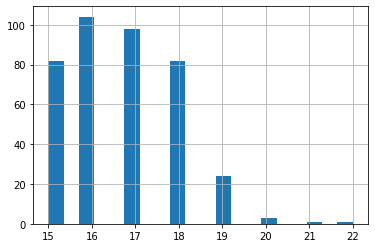

In [8]:
show_info_num(stud_math.age)  # Распределение возраста

In [9]:
show_info(stud_math.address)  # тип адреса ученика ('U' - городской,
# 'R' - за городом)
# Пропущенные значения заменим модой
fillna_mode(stud_math.address)

,address
U,295
R,83


Количество пропущенных значений: 17
Самое популярное значение: U
Пропущенные значения заменили на значение моды: U


In [10]:
show_info(stud_math.famsize)  # размер семьи('LE3' <= 3, 'GT3' >3)
# Пропущенные значения заменим модой
fillna_mode(stud_math.famsize)

,famsize
GT3,261
LE3,107


Количество пропущенных значений: 27
Самое популярное значение: GT3
Пропущенные значения заменили на значение моды: GT3


In [11]:
show_info(stud_math.pstatus)  # статус совместного жилья родителей
# ('T' - живут вместе 'A' - раздельно)
# Пропущенные значения заменим модой
fillna_mode(stud_math.pstatus)

,pstatus
T,314
A,36


Количество пропущенных значений: 45
Самое популярное значение: T
Пропущенные значения заменили на значение моды: T


count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

Количество пропущенных значений: 3
Пропущенные значения заменили на значение медианы: 3.0


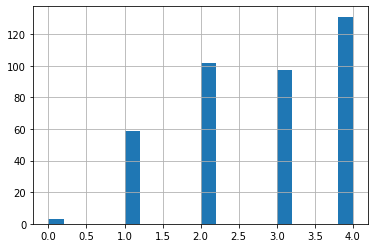

In [12]:
show_info_num(stud_math.medu)  # образование матери (0 - нет, 1 - 4 класса,
# 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
# Пропущенные значения заменим медианой
fillna_median(stud_math.medu)

count    395.000000
mean       2.751899
std        1.094154
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

Количество пропущенных значений: 0


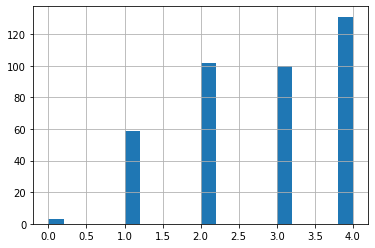

In [13]:
show_info_num(stud_math.medu)

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: fedu, dtype: float64

Количество пропущенных значений: 24
Пропущенные значения заменили на значение медианы: 2.0


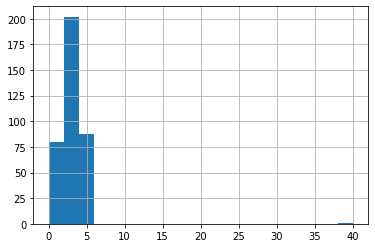

In [14]:
show_info_num(stud_math.fedu)  # образование отца (0 - нет, 1 - 4 класса,
# 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
# Содержит ошибочное значение, которое было полученено в результате
# ошибки ввода. Заменим его на нормальное значение
stud_math.fedu = stud_math.fedu.replace(40.0, 4.0)
# Пропущенные значения заменим медианой
fillna_median(stud_math.fedu)

count    395.000000
mean       2.486076
std        1.062362
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: fedu, dtype: float64

Количество пропущенных значений: 0


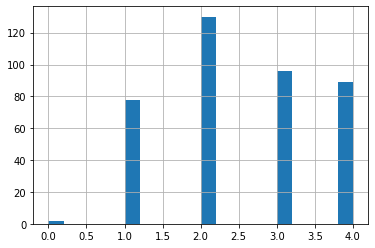

In [15]:
show_info_num(stud_math.fedu)

In [16]:
show_info(stud_math.mjob)  # работа матери ('teacher' - учитель,
# 'health' - сфера здравоохранения, 'services' - гос служба,
# 'at_home' - не работает, 'other' - другое)
# Пропущенные значения заменим модой
fillna_mode(stud_math.mjob)

,mjob
other,133
services,98
at_home,58
teacher,55
health,32


Количество пропущенных значений: 19
Самое популярное значение: other
Пропущенные значения заменили на значение моды: other


In [17]:
show_info(stud_math.fjob)  # работа отца ('teacher' - учитель,
# 'health' - сфера здравоохранения, 'services' - гос служба,
# 'at_home' - не работает, 'other' - другое)
# Пропущенные значения заменим модой
fillna_mode(stud_math.fjob)

,fjob
other,197
services,102
teacher,29
at_home,16
health,15


Количество пропущенных значений: 36
Самое популярное значение: other
Пропущенные значения заменили на значение моды: other


In [18]:
show_info(stud_math.reason)  # причина выбора школы ('home' - близость к дому,
# 'reputation' - репутация школы, 'course' - образовательная программа,
# 'other' - другое)
# Пропущенные значения заменим модой
fillna_mode(stud_math.reason)

,reason
course,137
home,104
reputation,103
other,34


Количество пропущенных значений: 17
Самое популярное значение: course
Пропущенные значения заменили на значение моды: course


In [19]:
show_info(stud_math.guardian)  # опекун ('mother' - мать, 'father' - отец,
# 'other' - другое)
# Пропущенные значения заменим модой
fillna_mode(stud_math.guardian)

,guardian
mother,250
father,86
other,28


Количество пропущенных значений: 31
Самое популярное значение: mother
Пропущенные значения заменили на значение моды: mother


count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

Количество пропущенных значений: 28
Пропущенные значения заменили на значение медианы: 1.0


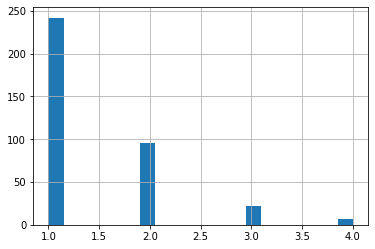

In [20]:
show_info_num(stud_math.traveltime)  # время в пути до школы (1 - <15 мин.,
# 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
# Пропущенные значения заменим медианой
fillna_median(stud_math.traveltime)

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

Количество пропущенных значений: 7
Пропущенные значения заменили на значение медианы: 2.0


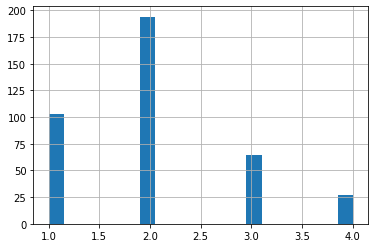

In [21]:
show_info_num(stud_math.studytime)  # время на учёбу помимо школы в неделю
# (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
# Пропущенные значения заменим медианой
fillna_median(stud_math.studytime)

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

Количество пропущенных значений: 22
Пропущенные значения заменили на значение медианы: 0.0


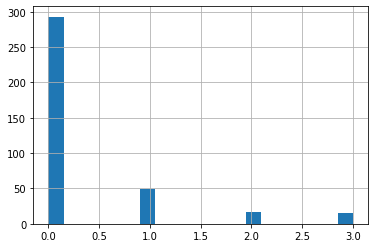

In [22]:
show_info_num(stud_math.failures)  # количество внеучебных неудач
# (n, если 1<=n<=3, иначе 0)
# Пропущенные значения заменим медианой
fillna_median(stud_math.failures)

In [23]:
show_info(stud_math.schoolsup)  # дополнительная образовательная
# поддержка (yes или no)
# Пропущенные значения заменим модой
fillna_mode(stud_math.schoolsup)

,schoolsup
no,335
yes,51


Количество пропущенных значений: 9
Самое популярное значение: no
Пропущенные значения заменили на значение моды: no


In [24]:
show_info(stud_math.famsup)  # семейная образовательная поддержка (yes или no)
# Пропущенные значения заменим модой
fillna_mode(stud_math.famsup)

,famsup
yes,219
no,137


Количество пропущенных значений: 39
Самое популярное значение: yes
Пропущенные значения заменили на значение моды: yes


In [25]:
show_info(stud_math.paid)  # дополнительные платные занятия по
# математике (yes или no)
# Пропущенные значения заменим модой
fillna_mode(stud_math.paid)

,paid
no,200
yes,155


Количество пропущенных значений: 40
Самое популярное значение: no
Пропущенные значения заменили на значение моды: no


In [26]:
show_info(stud_math.activities)  # дополнительные внеучебные
# занятия (yes или no)
# Пропущенные значения заменим модой
fillna_mode(stud_math.activities)

,activities
yes,195
no,186


Количество пропущенных значений: 14
Самое популярное значение: yes
Пропущенные значения заменили на значение моды: yes


In [27]:
show_info(stud_math.nursery)  # посещал детский сад (yes или no)
# Пропущенные значения заменим модой
fillna_mode(stud_math.nursery)

,nursery
yes,300
no,79


Количество пропущенных значений: 16
Самое популярное значение: yes
Пропущенные значения заменили на значение моды: yes


count    388.000000
mean      -6.115979
std        2.526235
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime_granular, dtype: float64

Количество пропущенных значений: 7


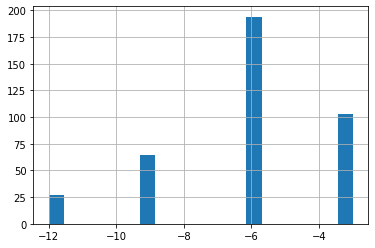

In [28]:
show_info_num(stud_math.studytime_granular)
# Данный столбец не представлен в описании,заполнен отрицательными значениями
# и не несет в себе какие либо полезные данные.
# Удалим данный столбец
stud_math.drop(['studytime_granular'], inplace=True, axis=1)

In [29]:
show_info(stud_math.higher)  # хочет получить высшее образование (yes или no)
# Пропущенные значения заменим модой
fillna_mode(stud_math.higher)

,higher
yes,356
no,19


Количество пропущенных значений: 20
Самое популярное значение: yes
Пропущенные значения заменили на значение моды: yes


In [30]:
show_info(stud_math.internet)  # наличие интернета дома (yes или no)
# Пропущенные значения заменим модой
fillna_mode(stud_math.internet)

,internet
yes,305
no,56


Количество пропущенных значений: 34
Самое популярное значение: yes
Пропущенные значения заменили на значение моды: yes


In [31]:
show_info(stud_math.romantic)  # в романтических отношениях (yes или no)
# Пропущенные значения заменим модой
fillna_mode(stud_math.romantic)

,romantic
no,240
yes,124


Количество пропущенных значений: 31
Самое популярное значение: no
Пропущенные значения заменили на значение моды: no


count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

Количество пропущенных значений: 27
Пропущенные значения заменили на значение медианы: 4.0


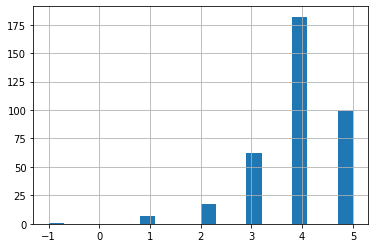

In [32]:
show_info_num(stud_math.famrel)  # семейные отношения (от 1 - очень плохо
# до 5 - очень хорошо)
# Существуют данные, введенные с отрицательным знаком, заменим их на нормальные
stud_math.famrel = stud_math.famrel.replace(-1.0, 1)
# Пропущенные значения заменим медианой
fillna_median(stud_math.famrel)

count    395.000000
mean       3.946835
std        0.872425
min        1.000000
25%        4.000000
50%        4.000000
75%        4.500000
max        5.000000
Name: famrel, dtype: float64

Количество пропущенных значений: 0


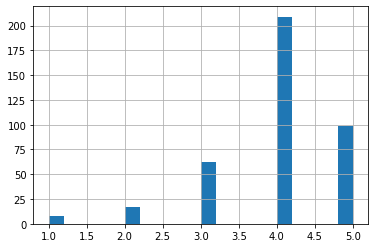

In [33]:
show_info_num(stud_math.famrel)

count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

Количество пропущенных значений: 11
Пропущенные значения заменили на значение медианы: 3.0


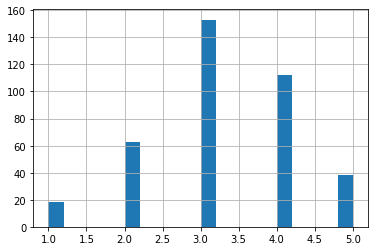

In [34]:
show_info_num(stud_math.freetime)  # свободное время после школы
# (от 1 - очень мало до 5 - очень мого)
# Пропущенные значения заменим медианой
fillna_median(stud_math.freetime)

count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

Количество пропущенных значений: 8
Пропущенные значения заменили на значение медианы: 3.0


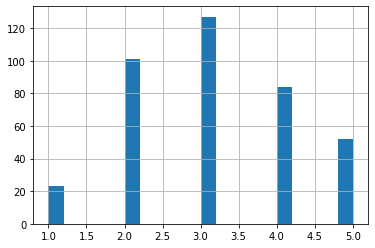

In [35]:
show_info_num(stud_math.goout)  # проведение времени с друзьями
# (от 1 - очень мало до 5 - очень много)
# Пропущенные значения заменим медианой
fillna_median(stud_math.goout)

In [36]:
show_info(stud_math.health)  # текущее состояние здоровья
# (от 1 - очень плохо до 5 - очень хорошо)
# Пропущенные значения заменим медианой
fillna_median(stud_math.health)

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


Количество пропущенных значений: 15
Самое популярное значение: 5.0
Пропущенные значения заменили на значение медианы: 4.0


count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

Количество пропущенных значений: 12


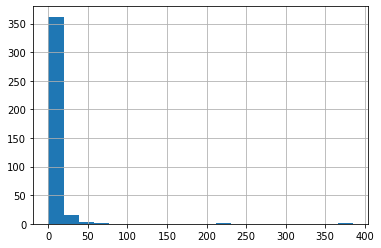

In [37]:
show_info_num(stud_math.absences)  # количество пропущенных занятий
# Существуют выбросы!

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


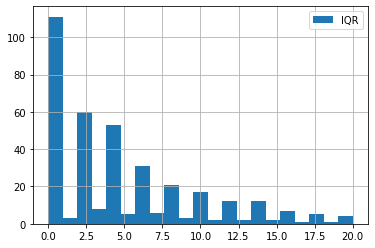

In [38]:
# Построим график интерквартильного расстояния для фильтрации выбросов
median = stud_math.absences.median()
IQR = stud_math.absences.quantile(0.75)-stud_math.absences.quantile(0.25)
perc25 = stud_math.absences.quantile(0.25)
perc75 = stud_math.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR,
                                             l=perc75 + 1.5*IQR))
stud_math.absences.loc[stud_math.absences.between(perc25 - 1.5*IQR,
                                                  perc75 + 1.5*IQR)].hist(
    bins=21, range=(0, 20), label='IQR')
plt.legend()

In [39]:
# Границы выбросов расположены от -12 до 20
# Существует два значительных выброса: 212 и 385,которые не естественны и не
# логчичны для данного параметра, который показывет количество пропущенных
# занятий.
# Так как данный параметр может быть очень важным для анализа итоговой оценки,
# для дальнейшео удобства, следует исключить из данных только эти существенные
# выбросы.
stud_math = stud_math.loc[stud_math.absences < 212]

count    381.000000
mean       5.750656
std        8.088542
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

Количество пропущенных значений: 0


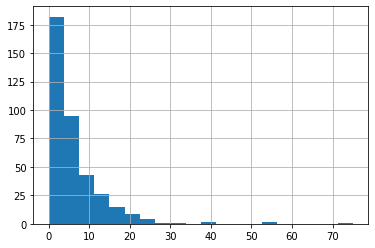

In [40]:
show_info_num(stud_math.absences)

count    376.000000
mean      51.968085
std       22.797287
min        0.000000
25%       40.000000
50%       55.000000
75%       66.250000
max      100.000000
Name: score, dtype: float64

Количество пропущенных значений: 5
Пропущенные значения заменили на значение медианы: 55.0


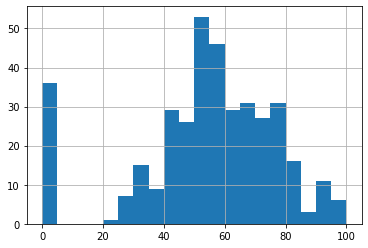

In [41]:
show_info_num(stud_math.score)  # баллы по госэкзамену по математике
# Пропущенные значения заменим медианой
fillna_median(stud_math.score)

count    381.000000
mean      52.007874
std       22.649444
min        0.000000
25%       40.000000
50%       55.000000
75%       65.000000
max      100.000000
Name: score, dtype: float64

Количество пропущенных значений: 0


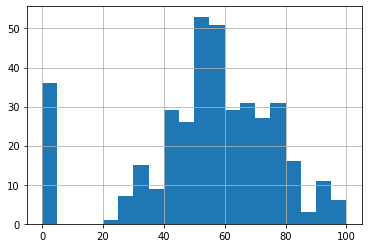

In [42]:
show_info_num(stud_math.score)

In [43]:
stud_math.info()
stud_math.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      381 non-null    object 
 1   sex         381 non-null    object 
 2   age         381 non-null    int64  
 3   address     381 non-null    object 
 4   famsize     381 non-null    object 
 5   pstatus     381 non-null    object 
 6   medu        381 non-null    float64
 7   fedu        381 non-null    float64
 8   mjob        381 non-null    object 
 9   fjob        381 non-null    object 
 10  reason      381 non-null    object 
 11  guardian    381 non-null    object 
 12  traveltime  381 non-null    float64
 13  studytime   381 non-null    float64
 14  failures    381 non-null    float64
 15  schoolsup   381 non-null    object 
 16  famsup      381 non-null    object 
 17  paid        381 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     381 non-null    o

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,U,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,GT3,T,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


# Корреляционный анализ и анализ номинативных переменных

На данном этапе у нас имеется датафрейм, содержащий 29 столбцов и 381 строку. 

In [44]:
stud_math.corr()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.162153,-0.154150,0.089164,-0.002262,0.198914,0.056166,0.017633,0.113023,-0.071144,0.166773,-0.145689
medu,-0.162153,1.000000,0.598050,-0.173464,0.065091,-0.236433,-0.024902,0.013725,0.057105,-0.061780,0.096825,0.198159
fedu,-0.154150,0.598050,1.000000,-0.119916,-0.007546,-0.256606,-0.028416,-0.033382,0.033816,0.004198,0.037103,0.106168
traveltime,0.089164,-0.173464,-0.119916,1.000000,-0.098825,0.063237,-0.026025,-0.006397,0.051838,-0.033798,-0.002066,-0.058335
studytime,-0.002262,0.065091,-0.007546,-0.098825,1.000000,-0.157519,0.031275,-0.122426,-0.046827,-0.077317,-0.067633,0.108044
failures,0.198914,-0.236433,-0.256606,0.063237,-0.157519,1.000000,-0.007347,0.094939,0.089027,0.066414,0.065398,-0.311339
famrel,0.056166,-0.024902,-0.028416,-0.026025,0.031275,-0.007347,1.000000,0.165135,0.078575,0.084788,-0.044169,0.057916
freetime,0.017633,0.013725,-0.033382,-0.006397,-0.122426,0.094939,0.165135,1.000000,0.296949,0.047017,-0.071617,0.013993
goout,0.113023,0.057105,0.033816,0.051838,-0.046827,0.089027,0.078575,0.296949,1.000000,-0.010219,0.036931,-0.130137
health,-0.071144,-0.061780,0.004198,-0.033798,-0.077317,0.066414,0.084788,0.047017,-0.010219,1.000000,-0.024809,-0.057600


Для наглядности, построим heatmap матрицы корреляции

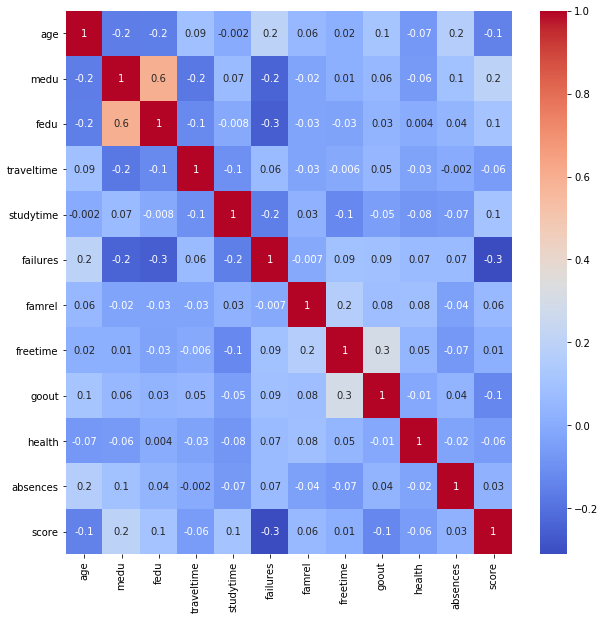

In [45]:
plt.figure(figsize = (10,10))
sns.heatmap(stud_math.corr(), annot=True, fmt='.1g', cmap= 'coolwarm')

Как видно из графика, значения столбцов образования родителей скоррелированы сильнее всех, и это не удивительно. С интересующим нас столбцом итоговой оценки сильнее всех скоррелирован параметр внеучебных неудач, и это тоже вполне логично.Чуть меньше скоррелирован столбец образования матери.
Остальные данные слабо скоррелированы с интересующим нас столбцом.
Для будущей модели оставим только те параметры, у которых сила корреляции со столбцом score по модулю >= 0.1, а именно столбцы: age,medu,fedu,studytime,failures,goout.


## Проанализируем номинативные переменные.
Для этого рассмотрим значения итоговой оценки в зависимости от 
интересующих нас переменных с помошью box-plot.

In [46]:
# Напишем функцию, с помощью которой сможем быстро построить графики для
# нужных переменных


def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 10))
    sns.boxplot(x=column, y='score',
                data=stud_math.loc[stud_math.loc[:,
                                                 column].isin(
                    stud_math.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

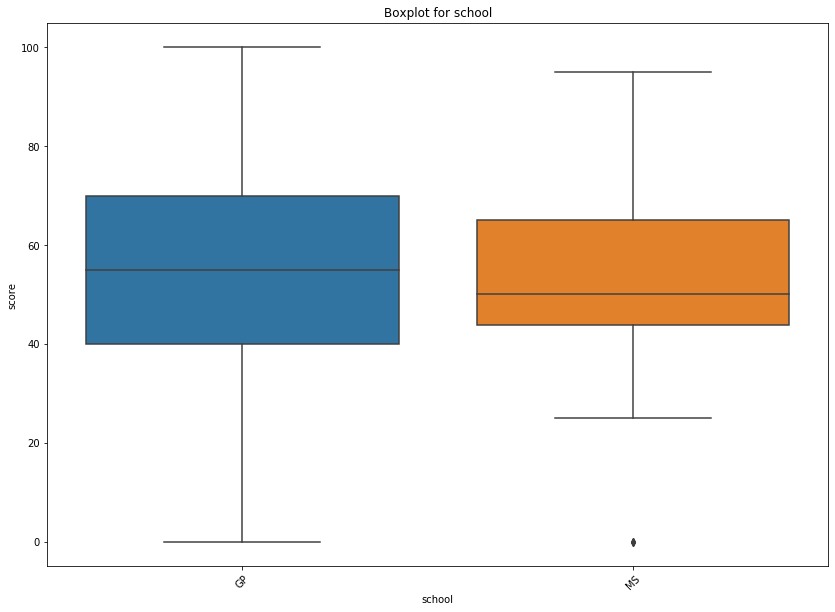

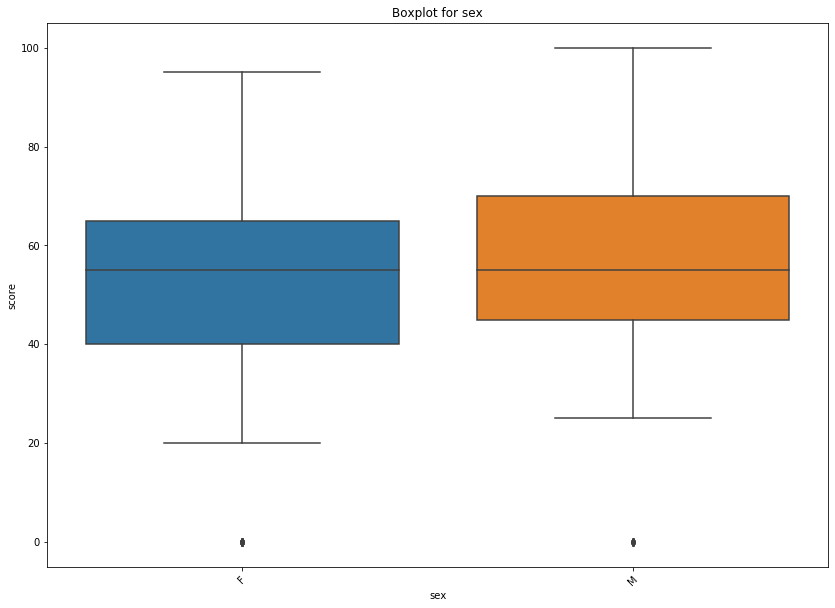

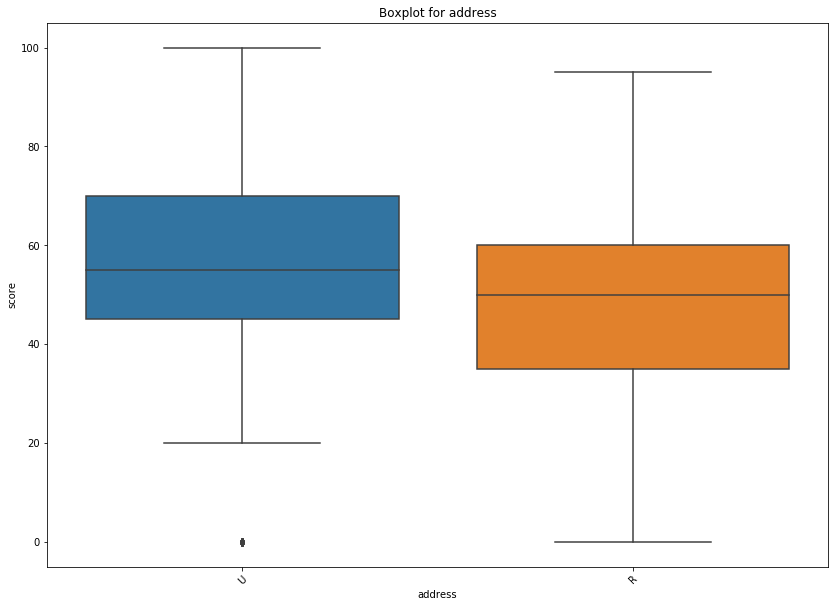

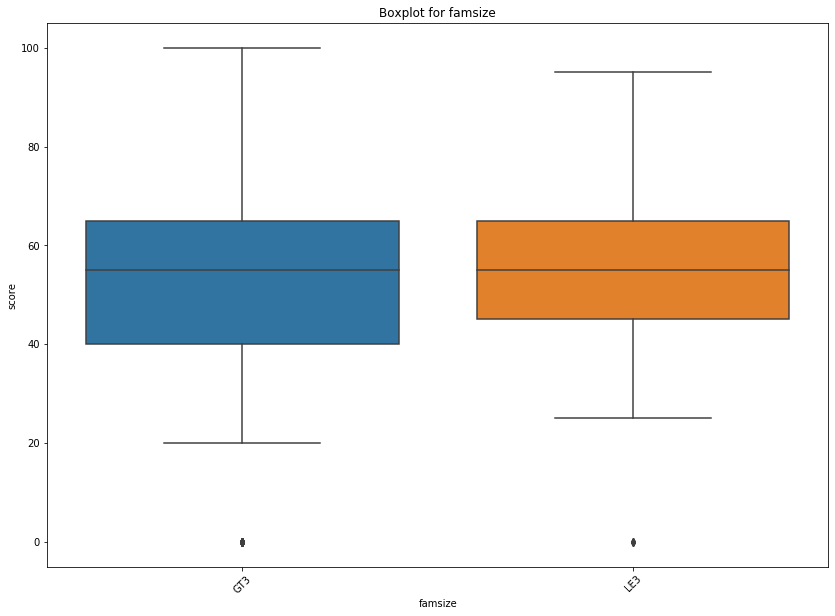

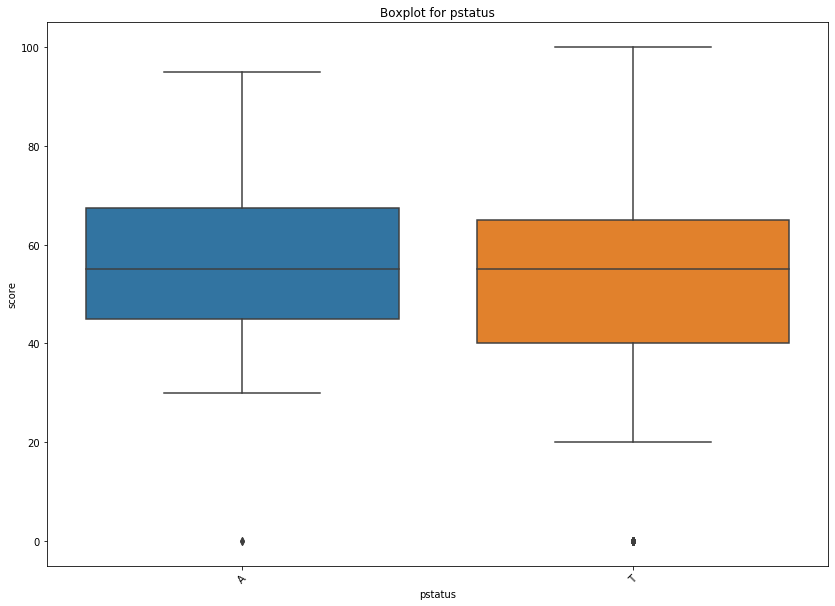

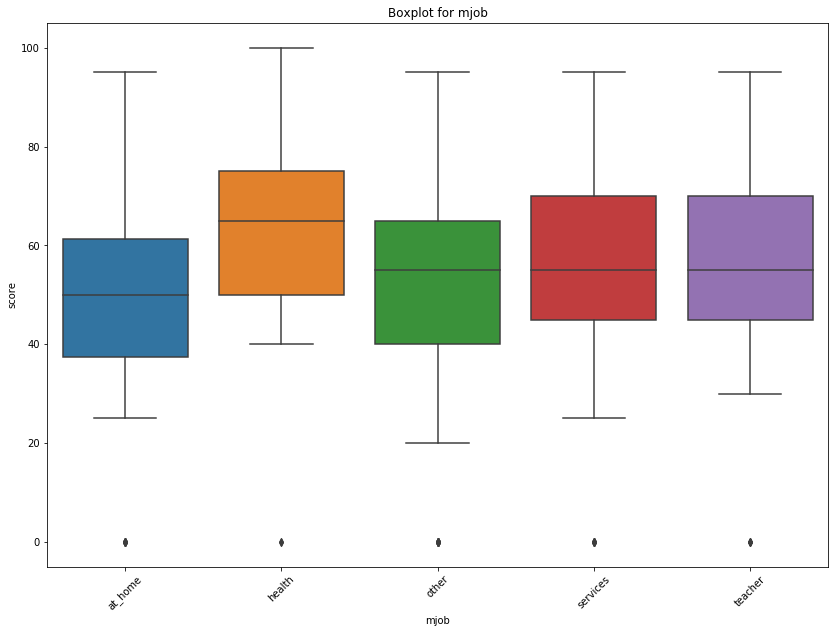

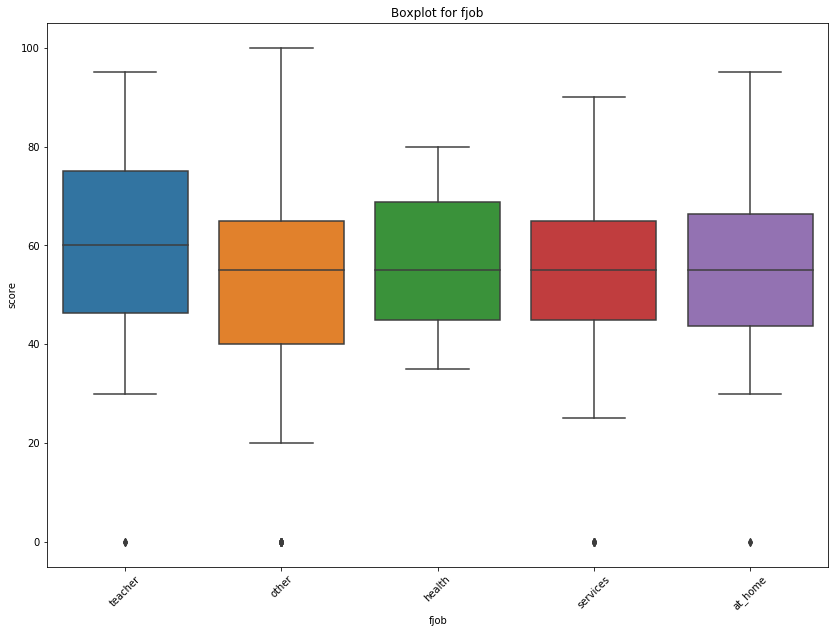

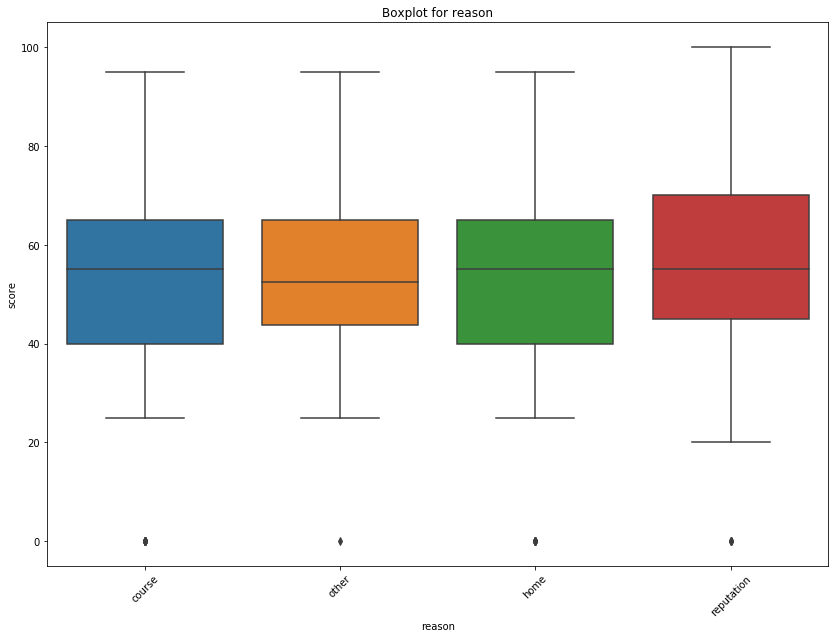

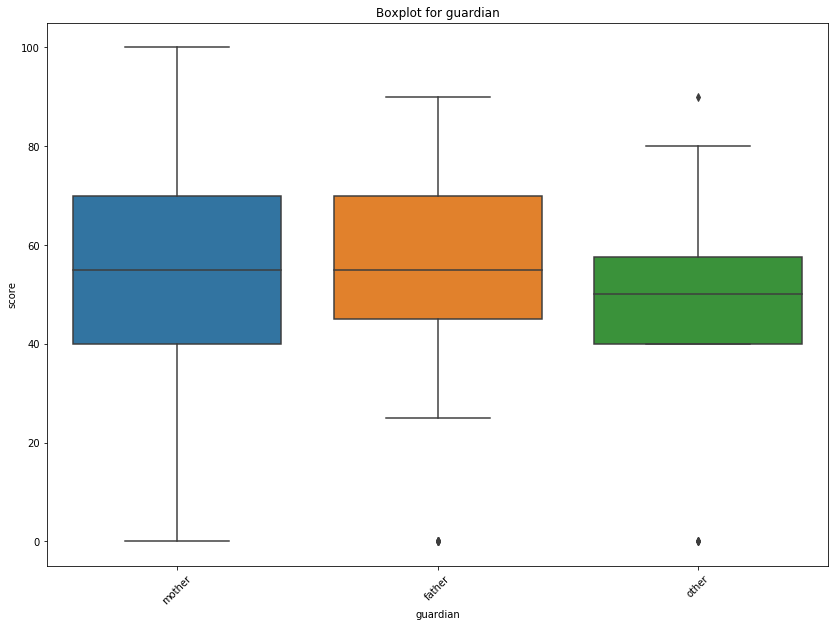

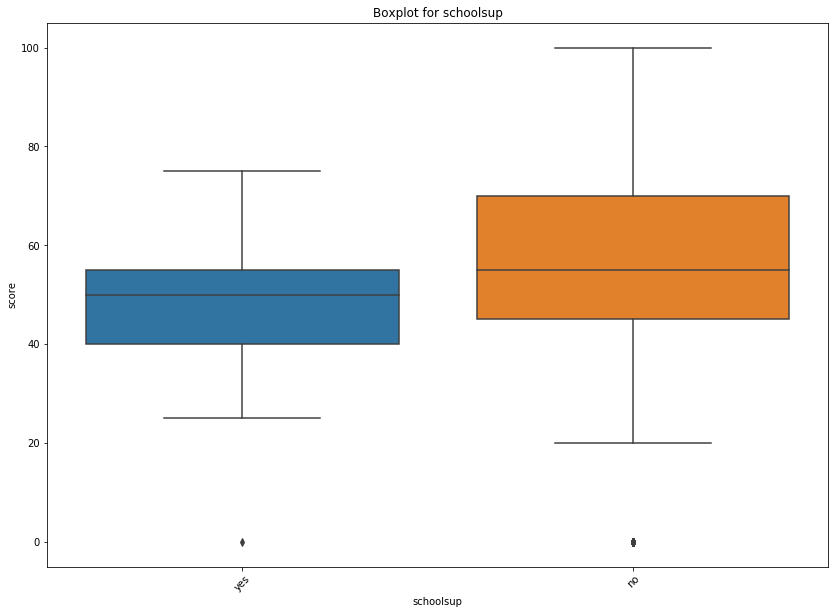

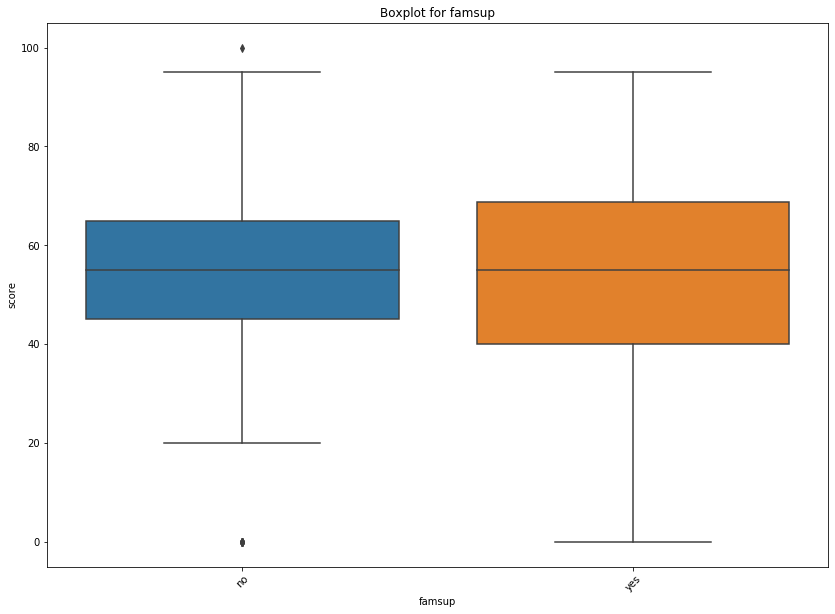

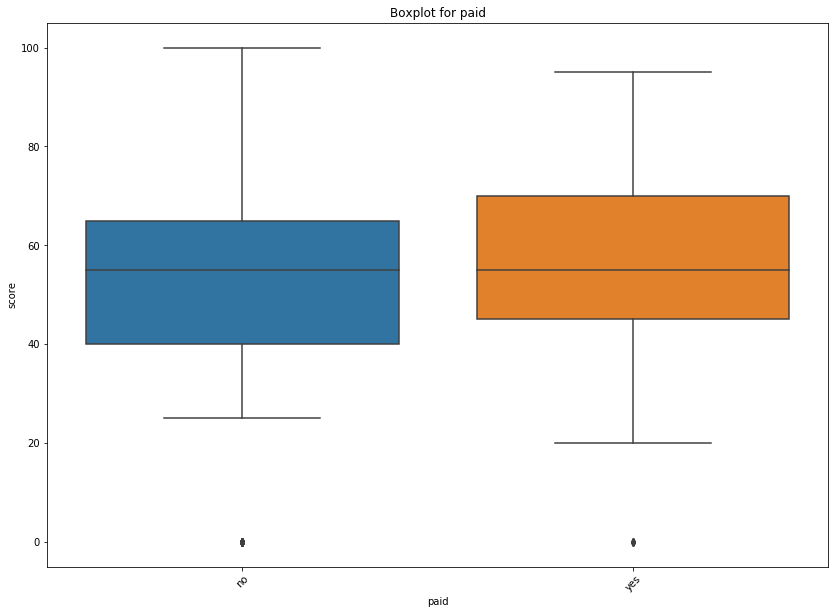

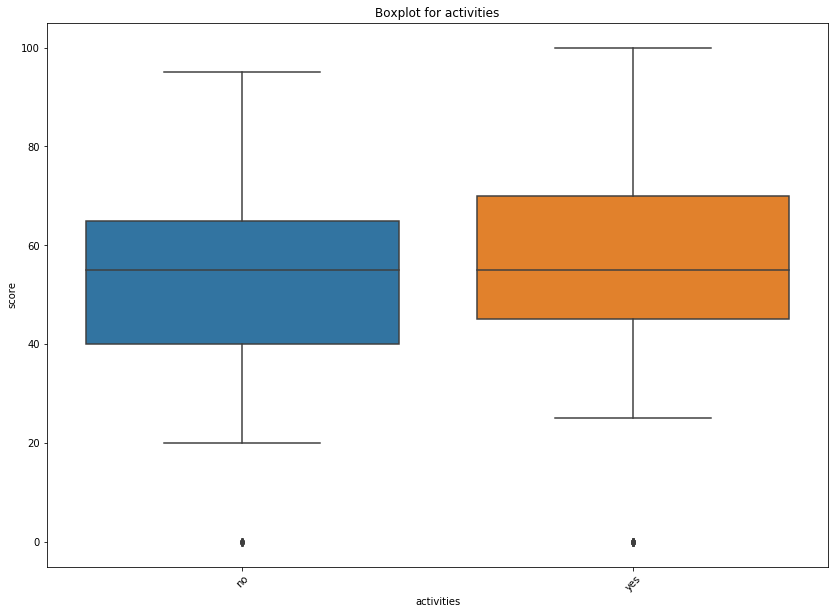

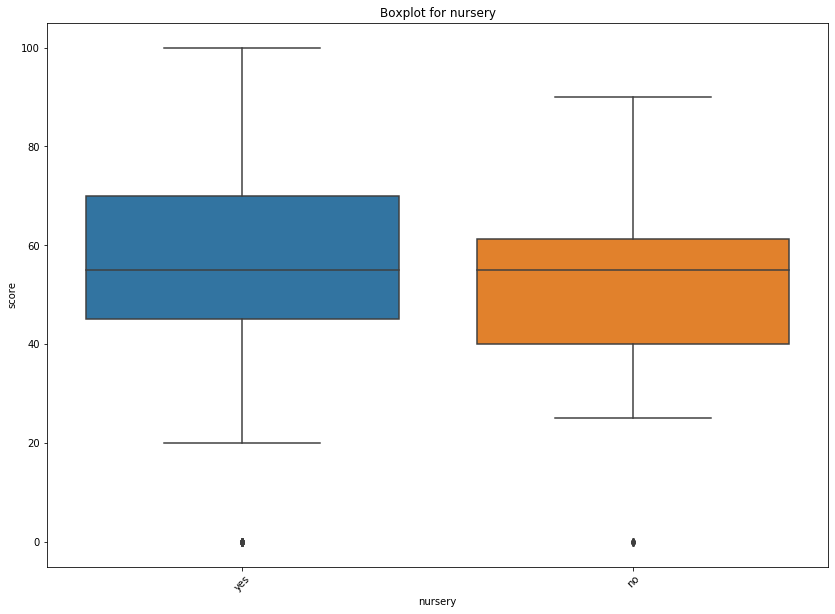

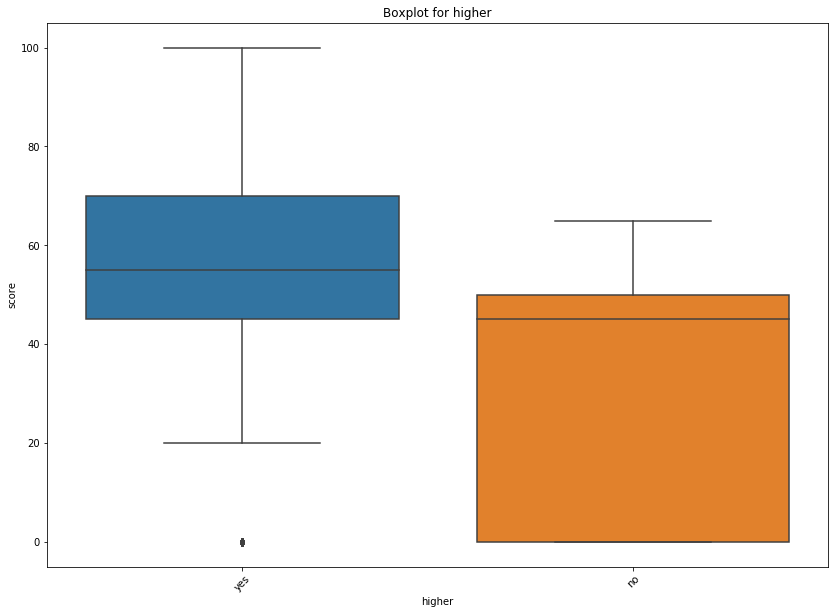

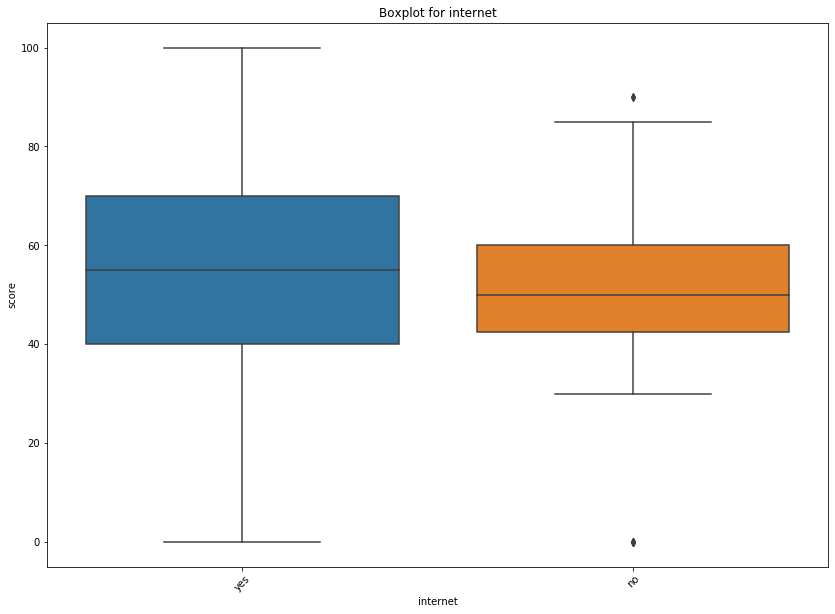

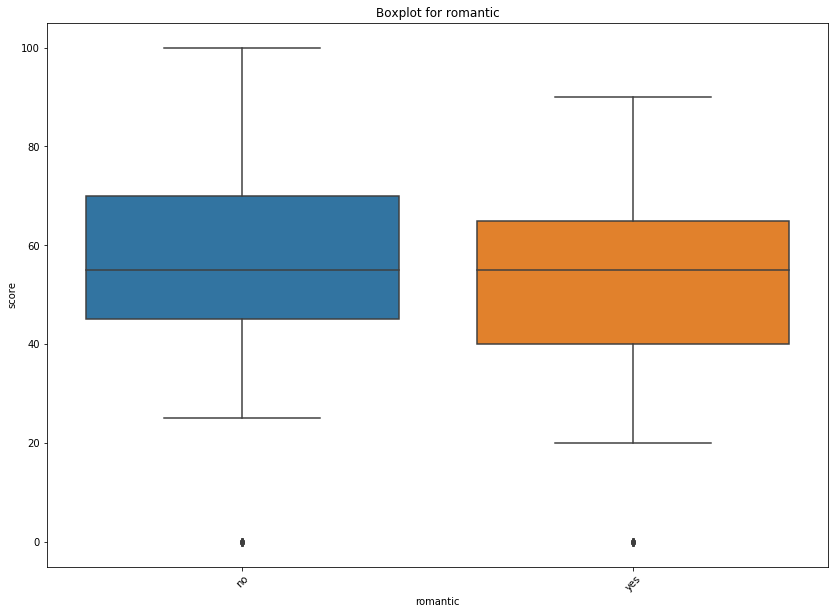

In [47]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob',
            'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
            'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

Рассмотрим и проанализируем полученные графики.
В среднем, ученики из школы MS написали тест чуть хуже. 
Девушки написали тест немного хуже мужчин.
На графике adress можем заметить, что ученики, живущие за городом, в целом написали экзамен чуть хуже.
Размер семьи незначительно влияет на результат.
Статус совместного жилья родителей почти не сказывается на результате.
Для графика mjob мы видим, что ученики, у которых мама работает в сфере здравоохранения, в целом, написали экзамен намного лучше остальных.
На графике fjob видно, что лучше результат показывают ученики, у которых отцы  работают учетилями, но не так очевидно ,как на прошлом графике.
Причина выбора школы не сильно влияет на результат.
На графике guardian видно,  нет значительных отличий от того, кто является опекуном.
График, показывающий результаты тестов учеников, у которых была образовательная поддержка является интересным,так как те ученики, у которых была поддержка, в среднем написали тест на меньшее количество баллов.
График famsup не представляет интереса.
Так же, как и графики для  paid и activities.
Посещение детского сада так же не дает каких либо существенных преимуществ в написании экзамена.
Самым интересным является график higher. На нем отчетливо видно, что те ученики, кто не планирует получить высшее образование, пишут экзамен намного хуже остальных учеников.
Ученики бездомашнего интернета написали экзамен чуть хуже.
На графике romantic не видно существенных отличий между учениками.

In [48]:
# Проверим, есть ли статистическая разница в распределении оценок по
# номинативным признакам, с помощью теста Стьюдента.
# Проверим нулевую гипотезу о том, что распределения результатов теста
# по различным параметрам неразличимы


def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:,
                                                 column] == comb[0], 'score'],
                     stud_math.loc[stud_math.loc[:, column] == comb[1],
                                   'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки',
                  column)
            break

In [49]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob',
            'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
            'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


# Итоги


По результатам анализа, наиболее значимыми параметрами оказались:age,medu,fedu,studytime,failures,goout,sex,adress,mjob,higher,romantic.
Оставим эти переменные в итоговом датасете для построения модели.



In [50]:
stud_for_model = stud_math.loc[:, ['sex', 'age', 'address', 'medu', 'fedu',
                                   'mjob', 'studytime', 'failures', 'higher', 
                                   'romantic', 'goout', 'score']]

In [51]:
stud_for_model.head()

,sex,age,address,medu,fedu,mjob,studytime,failures,higher,romantic,goout,score
0,F,18,U,4.0,4.0,at_home,2.0,0.0,yes,no,4.0,30.0
1,F,17,U,1.0,1.0,at_home,2.0,0.0,yes,no,3.0,30.0
2,F,15,U,1.0,1.0,at_home,2.0,3.0,yes,no,2.0,50.0
3,F,15,U,4.0,2.0,health,3.0,0.0,yes,yes,2.0,75.0
4,F,16,U,3.0,3.0,other,2.0,0.0,yes,no,2.0,50.0
